In [1]:
"""
## 1. What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is a statistical model used for binary classification. Unlike Linear Regression, which 
predicts continuous values, Logistic Regression estimates the probability that a given input belongs to a 
particular class.

## 2. What is the mathematical equation of Logistic Regression?

Logistic Regression is based on the sigmoid function:

\[
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_n X_n)}}
\]

## 3. Why do we use the Sigmoid function in Logistic Regression?

The Sigmoid function maps any real-valued number into the (0,1) range, making it useful for probability estimation.

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

## 4. What is the cost function of Logistic Regression?

Logistic Regression uses the log loss (logistic loss) function:

\[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
\]

## 5. What is Regularization in Logistic Regression? Why is it needed?

Regularization prevents overfitting by adding a penalty to the loss function. L1 (Lasso) and L2 (Ridge) regularization are commonly used.

## 6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

- **Lasso Regression (L1 penalty):** Shrinks some coefficients to zero, performing feature selection.
- **Ridge Regression (L2 penalty):** Shrinks coefficients but does not set them to zero.
- **Elastic Net:** Combines L1 and L2 penalties.

## 7. When should we use Elastic Net instead of Lasso or Ridge?

Elastic Net is preferred when there are many correlated features.

## 8. What is the impact of the regularization parameter (λ) in Logistic Regression?

Higher λ increases regularization, reducing overfitting but potentially increasing bias.

## 9. What are the key assumptions of Logistic Regression?

1. The dependent variable is binary.
2. No multicollinearity between predictors.
3. Large sample size for stable estimates.

## 10. What are some alternatives to Logistic Regression for classification tasks?

- Decision Trees
- Random Forest
- Support Vector Machines
- Neural Networks

## 11. What are Classification Evaluation Metrics?

- Accuracy
- Precision, Recall, F1-score
- ROC-AUC score

## 12. How does class imbalance affect Logistic Regression?

Class imbalance can lead to biased predictions. Solutions include oversampling, undersampling, and using weighted loss functions.

## 13. What is Hyperparameter Tuning in Logistic Regression?

Tuning parameters such as the regularization strength (C) using GridSearchCV or RandomizedSearchCV.

## 14. What are different solvers in Logistic Regression? Which one should be used?

- **liblinear**: Small datasets, L1/L2 regularization.
- **saga**: Large datasets, supports L1/L2/Elastic Net.
- **newton-cg, lbfgs**: Suitable for L2 regularization.

## 15. How is Logistic Regression extended for multiclass classification?

Using One-vs-Rest (OvR) or Softmax Regression (Multinomial Logistic Regression).

## 16. What are the advantages and disadvantages of Logistic Regression?

**Advantages:**
- Simple and interpretable
- Works well on linearly separable data

**Disadvantages:**
- Assumes linearity
- Can struggle with high-dimensional data

## 17. What are some use cases of Logistic Regression?

- Spam detection
- Disease diagnosis
- Customer churn prediction

## 18. What is the difference between Softmax Regression and Logistic Regression?

Softmax Regression generalizes Logistic Regression for multi-class classification.

## 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

- **OvR:** More interpretable, used when computational efficiency is required.
- **Softmax:** Preferred when classes are mutually exclusive.

## 20. How do we interpret coefficients in Logistic Regression?

Coefficients indicate the log-odds change of the dependent variable per unit change in an independent variable.
"""


'\n## 1. What is Logistic Regression, and how does it differ from Linear Regression?\n\nLogistic Regression is a statistical model used for binary classification. Unlike Linear Regression, which \npredicts continuous values, Logistic Regression estimates the probability that a given input belongs to a \nparticular class.\n\n## 2. What is the mathematical equation of Logistic Regression?\n\nLogistic Regression is based on the sigmoid function:\n\n\\[\nP(Y=1 | X) = \x0crac{1}{1 + e^{-(\x08eta_0 + \x08eta_1 X_1 + \\dots + \x08eta_n X_n)}}\n\\]\n\n## 3. Why do we use the Sigmoid function in Logistic Regression?\n\nThe Sigmoid function maps any real-valued number into the (0,1) range, making it useful for probability estimation.\n\n\\[\n\\sigma(z) = \x0crac{1}{1 + e^{-z}}\n\\]\n\n## 4. What is the cost function of Logistic Regression?\n\nLogistic Regression uses the log loss (logistic loss) function:\n\n\\[\nJ(\theta) = -\x0crac{1}{m} \\sum_{i=1}^{m} \\left[ y^{(i)} \\log(h_{\theta}(x^{(i)}

In [3]:
# 1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic 
# Regression, and prints the model accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression
model = LogisticRegression(max_iter=200, multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# output:Model Accuracy: 0.83

Model Accuracy: 0.83


In [6]:
# 2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression (penalty='IT')
# and print the model accuracy.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression with L1 Regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L1 Regularization: {accuracy:.2f}")
# output:Model Accuracy with L1 Regularization: 0.93

Model Accuracy with L1 Regularization: 0.93


In [7]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression 
# (penalty='12'). Print model accuracy and coefficients.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression with L2 Regularization (Ridge)
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L2 Regularization: {accuracy:.2f}")

# Print model coefficients
print("Model Coefficients:")
print(model.coef_)

# output
# Model Accuracy with L2 Regularization: 0.93
# Model Coefficients:
# [[-1.0888546   1.02392865 -1.79886876 -1.68516907]
#  [ 0.53614901 -0.36006071 -0.20459098 -0.80836173]
#  [ 0.55270559 -0.66386794  2.00345974  2.4935308 ]]

Model Accuracy with L2 Regularization: 0.93
Model Coefficients:
[[-1.0888546   1.02392865 -1.79886876 -1.68516907]
 [ 0.53614901 -0.36006071 -0.20459098 -0.80836173]
 [ 0.55270559 -0.66386794  2.00345974  2.4935308 ]]


In [8]:
# 4.Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty=elasticnet').
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Logistic Regression with Elastic Net Regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy:.2f}")

# Print model coefficients
print("Model Coefficients:")
print(model.coef_)

# output
# Model Accuracy with Elastic Net Regularization: 0.93
# Model Coefficients:
# [[-0.93217244  1.11160924 -2.00513479 -1.76452957]
#  [ 0.0312219   0.          0.         -0.42800293]
#  [ 0.         -0.36413792  2.44947428  3.18073067]]

Model Accuracy with Elastic Net Regularization: 0.93
Model Coefficients:
[[-0.93217244  1.11160924 -2.00513479 -1.76452957]
 [ 0.0312219   0.          0.         -0.42800293]
 [ 0.         -0.36413792  2.44947428  3.18073067]]


In [9]:
# 5.Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with one-vs-rest (OvR) strategy
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with One-vs-Rest: {accuracy:.2f}")

# Print model coefficients
print("Model Coefficients:")
print(model.coef_)

# output:
# Model Accuracy with One-vs-Rest: 0.90
# Model Coefficients:
# [[-1.07757579  1.1190145  -1.6910046  -1.55576353]
#  [ 0.06331393 -1.26614972  0.85721373 -0.90651175]
#  [ 0.23455475 -0.3931402   2.15272745  2.94525785]]

Model Accuracy with One-vs-Rest: 0.90
Model Coefficients:
[[-1.07757579  1.1190145  -1.6910046  -1.55576353]
 [ 0.06331393 -1.26614972  0.85721373 -0.90651175]
 [ 0.23455475 -0.3931402   2.15272745  2.94525785]]


In [11]:
# 6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic 
# Regression. Print the best parameters and accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=500)

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet']  # Different types of regularization
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

# output:
# Best Parameters: {'C': 0.1, 'penalty': 'l1'}
# Best Model Accuracy: 0.90

Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Model Accuracy: 0.90


/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saurabhkumar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saurabhkumar/anaconda3/

In [12]:
# 7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation, Print the
# average accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Standardize features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define Logistic Regression model
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=200)

# Define Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy for each fold
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print accuracy for each fold
print(f"Cross-Validation Accuracies: {cv_scores}")

# Print the average accuracy
print(f"Average Accuracy: {cv_scores.mean():.2f}")

# output:
# Cross-Validation Accuracies: [0.93333333 0.96666667 0.86666667 0.96666667 0.86666667]
# Average Accuracy: 0.92

Cross-Validation Accuracies: [0.93333333 0.96666667 0.86666667 0.96666667 0.86666667]
Average Accuracy: 0.92


In [14]:
import pandas as pd

# Sample dataset
data = {
    'feature1': [2.5, 1.8, 3.0, 2.2, 3.2, 1.5, 3.6, 2.0, 3.8, 1.9],
    'feature2': [3.1, 2.7, 3.5, 2.9, 3.8, 2.4, 4.1, 3.0, 4.2, 2.8],
    'feature3': [1.2, 0.8, 1.5, 1.1, 1.7, 0.7, 2.0, 1.0, 2.1, 0.9],
    'target': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV file
df.to_csv('sample_data.csv', index=False)

print("CSV file 'sample_data.csv' has been created successfully.")


CSV file 'sample_data.csv' has been created successfully.


In [16]:
# 8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from CSV file (Replace 'dataset.csv' with your file path)
df = pd.read_csv('sample_data.csv')

# Assume the last column is the target variable and others are features
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
# output:Model Accuracy: 1.00

Model Accuracy: 1.00


In [17]:
# 9.Write a Python program to apply Randomized SearchCV for tuning hyperparameters (C, penalty, solver) in 
# Logistic Regression. Print the best parameters and accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from scipy.stats import uniform

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Logistic Regression model
model = LogisticRegression(max_iter=500)

# Define hyperparameter search space
param_dist = {
    'C': uniform(0.01, 10),  # Continuous range for regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Different regularization types
    'solver': ['liblinear', 'saga']  # Solvers that support l1, l2, and elasticnet
}

# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
best_model = random_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.2f}")

# output:
# Best Parameters: {'C': 6.128528947223795, 'penalty': 'l2', 'solver': 'saga'}
# Best Model Accuracy: 0.97

Best Parameters: {'C': 6.128528947223795, 'penalty': 'l2', 'solver': 'saga'}
Best Model Accuracy: 0.97


In [19]:
# 10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with One-vs-One (OvO) strategy
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with One-vs-One: {accuracy:.2f}")

# output:Model Accuracy with One-vs-One: 0.90

Model Accuracy with One-vs-One: 0.90


Model Accuracy: 1.00


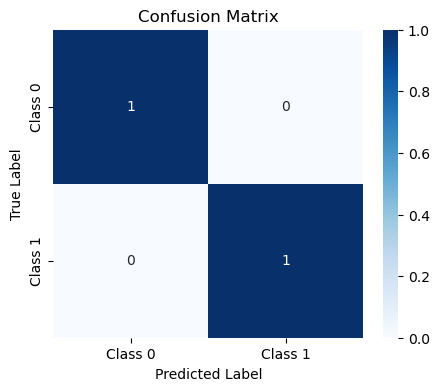

In [21]:
# 11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
# classification.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset from CSV file (Replace 'dataset.csv' with your actual file)
df = pd.read_csv('sample_data.csv')

# Assume the last column is the target variable and others are features
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column - binary classification)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# output:Model Accuracy: 1.00

In [23]:
# 12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, 
# Recall, and Fl-Score.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# output:
# Model Accuracy: 0.98
# Precision: 0.99
# Recall: 0.99
# F1-Score: 0.99

Model Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


Class Distribution: {0: 4472, 1: 528}
Model Accuracy: 0.86
Precision: 0.42
Recall: 0.83
F1-Score: 0.56


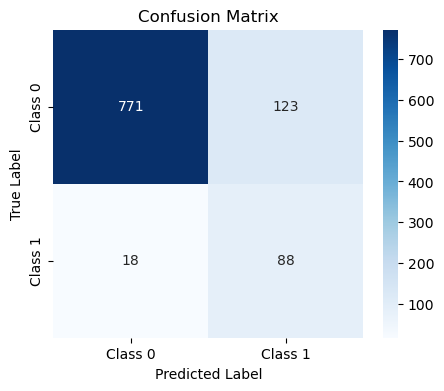

In [24]:
# 13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to 
# improve model performance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification

# Create an imbalanced dataset
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, weights=[0.90, 0.10], random_state=42)

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print(f"Class Distribution: {dict(zip(unique, counts))}")

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with class weights
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# output:
# Class Distribution: {0: 4472, 1: 528}
# Model Accuracy: 0.86
# Precision: 0.42
# Recall: 0.83
# F1-Score: 0.56

Model Accuracy: 0.81
Precision: 0.81
Recall: 0.67
F1-Score: 0.73


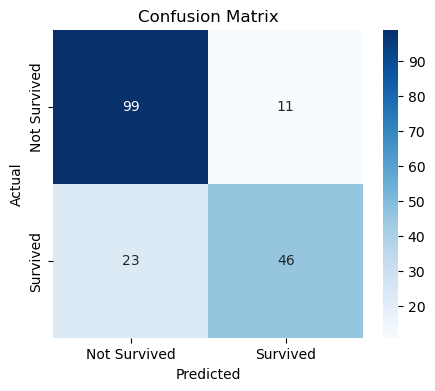

In [26]:
# 14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and 
# evaluate performance.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select relevant features and target variable
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"
df = df[features + [target]]

# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)  # Fill missing ages with median
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)  # Fill missing embarkation with mode

# Define features and target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# Preprocessing pipeline
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Pclass", "Sex", "Embarked"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))  # One-hot encoding, dropping first to avoid multicollinearity
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# output:
# Model Accuracy: 0.81
# Precision: 0.81
# Recall: 0.67
# F1-Score: 0.73

In [27]:
# 15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model.
# Evaluate its accuracy and compare results with and without scaling.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression without scaling
model_no_scaling = LogisticRegression(solver='liblinear')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Compute accuracy without scaling
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Apply Standardization (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaling
model_with_scaling = LogisticRegression(solver='liblinear')
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Compute accuracy with scaling
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# Print results
print(f"Accuracy without Scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with Standardization: {accuracy_with_scaling:.4f}")

# output:
# Accuracy without Scaling: 0.9561
# Accuracy with Standardization: 0.9825

Accuracy without Scaling: 0.9561
Accuracy with Standardization: 0.9825


ROC-AUC Score: 0.9957


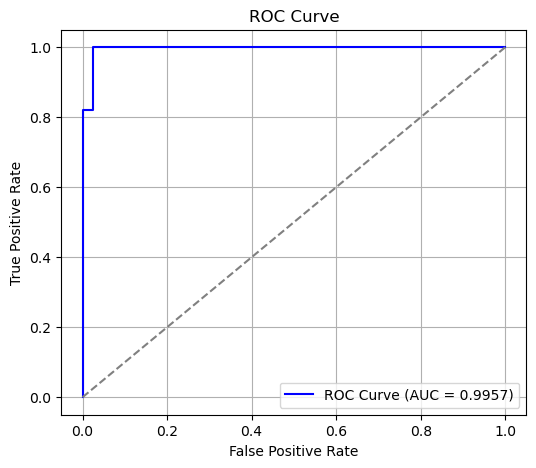

In [28]:
# 16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict probability scores
y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of the positive class

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# ouput:ROC-AUC Score: 0.9957

In [29]:
# 17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print model accuracy
print(f"Model Accuracy with C=0.5: {accuracy:.4f}")

# output:Model Accuracy with C=0.5: 0.9825

Model Accuracy with C=0.5: 0.9825


Top Important Features:
                 Feature  Coefficient
21         worst texture    -1.242272
10          radius error    -1.087929
23            worst area    -0.979282
13            area error    -0.958096
20          worst radius    -0.946000
27  worst concave points    -0.945296
28        worst symmetry    -0.928729
26       worst concavity    -0.827180
22       worst perimeter    -0.764807
24      worst smoothness    -0.759567


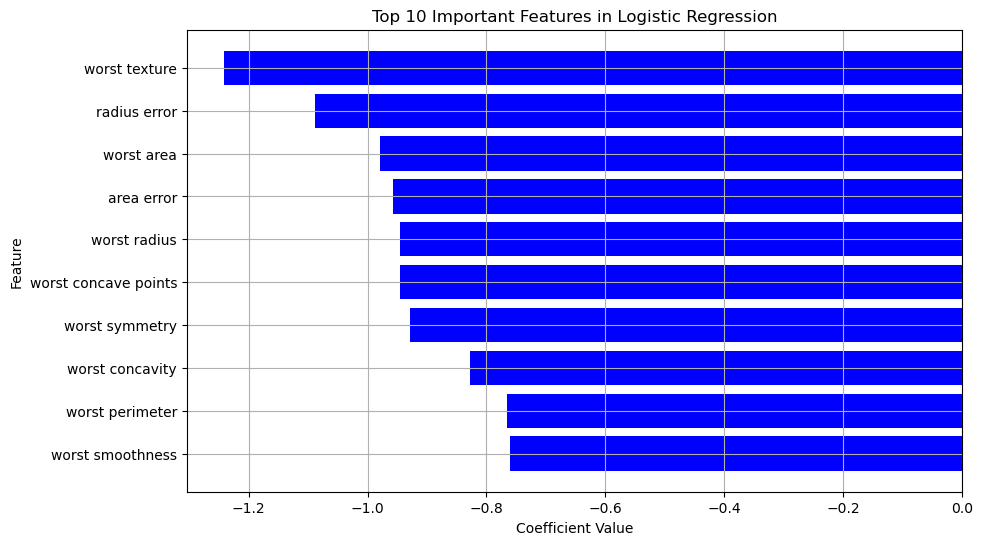

In [30]:
# 18.Write a Python program to train Logistic Regression and identify important features based on model coefficients. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Get model coefficients (importance of features)
feature_importance = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": model.coef_[0]
})

# Sort features by absolute importance
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Print top features
print("Top Important Features:")
print(feature_importance[["Feature", "Coefficient"]].head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"][:10], feature_importance["Coefficient"][:10], color='blue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Important Features in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid()
plt.show()


In [31]:
# 19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

# output:
# Model Accuracy: 0.9825
# Cohen's Kappa Score: 0.9623

Model Accuracy: 0.9825
Cohen's Kappa Score: 0.9623


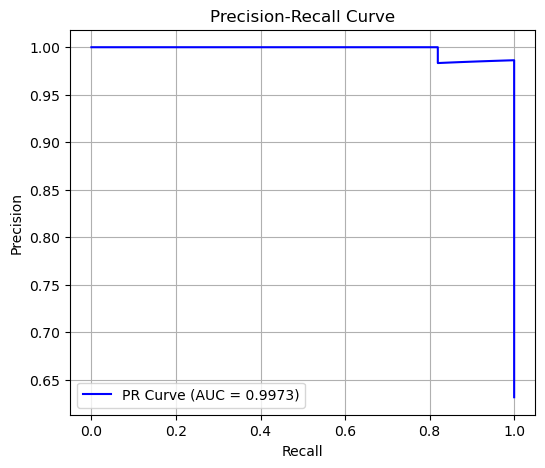

In [32]:
# 20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary 
# classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict probability scores for positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute PR-AUC (Area Under Curve)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [33]:
# 21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, Ibfgs) and 
# compare their accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of solvers to compare
solvers = ["liblinear", "saga", "lbfgs"]
results = {}

# Train and evaluate models with different solvers
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy
    print(f"Solver: {solver} | Accuracy: {accuracy:.4f}")

# Print comparison of solvers
print("\nComparison of Solvers:")
for solver, acc in results.items():
    print(f"{solver}: {acc:.4f}")

# output:
# Solver: liblinear | Accuracy: 0.9825
# Solver: saga | Accuracy: 0.9825
# Solver: lbfgs | Accuracy: 0.9825

# Comparison of Solvers:
# liblinear: 0.9825
# saga: 0.9825
# lbfgs: 0.9825

Solver: liblinear | Accuracy: 0.9825
Solver: saga | Accuracy: 0.9825
Solver: lbfgs | Accuracy: 0.9825

Comparison of Solvers:
liblinear: 0.9825
saga: 0.9825
lbfgs: 0.9825


In [34]:
# 22.Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation 
# Coefficient (MCC).

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute Matthews Correlation Coefficient (MCC)
mcc_score = matthews_corrcoef(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_score:.4f}")

# output:
# Model Accuracy: 0.9825
# Matthews Correlation Coefficient (MCC): 0.9623

Model Accuracy: 0.9825
Matthews Correlation Coefficient (MCC): 0.9623


In [35]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy
# to see the impact of feature scaling.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression on raw (unscaled) data
model_raw = LogisticRegression(solver='liblinear', max_iter=500)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(solver='liblinear', max_iter=500)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print accuracy comparison
print(f"Accuracy (Raw Data)       : {accuracy_raw:.4f}")
print(f"Accuracy (Standardized Data): {accuracy_scaled:.4f}")

# output:
# Accuracy (Raw Data)       : 0.9561
# Accuracy (Standardized Data): 0.9825

Accuracy (Raw Data)       : 0.9561
Accuracy (Standardized Data): 0.9825


In [36]:
# 24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using 
# cross-validation.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for C (regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=500)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter and train final model
best_C = grid_search.best_params_['C']
final_model = LogisticRegression(solver='liblinear', C=best_C, max_iter=500)
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best C (Regularization Strength): {best_C}")
print(f"Test Accuracy with Best C: {accuracy:.4f}")

# output:
# Best C (Regularization Strength): 1
# Test Accuracy with Best C: 0.9825

Best C (Regularization Strength): 1
Test Accuracy with Best C: 0.9825


In [37]:
# 25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again
# to make predictions.

import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (Binary: 0 = Malignant, 1 = Benign)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

# Save the trained model using joblib
joblib.dump(model, "logistic_regression_model.pkl")

# Load the model from the saved file
loaded_model = joblib.load("logistic_regression_model.pkl")

# Predict on test set using the loaded model
y_pred = loaded_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Trained model saved as 'logistic_regression_model.pkl' and successfully reloaded for prediction.")

# output:
# Model Accuracy: 0.9825
# Trained model saved as 'logistic_regression_model.pkl' and successfully reloaded for prediction.

Model Accuracy: 0.9825
Trained model saved as 'logistic_regression_model.pkl' and successfully reloaded for prediction.
